In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data = pd.read_csv('../../data/dataset/original_datasets/heart_2020_cleaned.csv')

In [4]:
# Checking for missing values and basic statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# Summary of data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# Display the first few rows
print(data.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [7]:
# Check for missing values in each column
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])  # Only show columns with missing values

Series([], dtype: int64)


In [8]:
# No. of null rows 
isNull = data.isna().sum()
duplicates_no = data.duplicated().sum()
print('Null values:\n',isNull)
# No. of duplicate rows
print('\n\nDuplicates: ', duplicates_no)
data_shape = data.shape

Null values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Duplicates:  18078


In [9]:
# Remove duplicates
data.drop_duplicates(inplace=True)
print('Dataframe shape before:', data_shape)
print('\nDataframe shape after:', data.shape)

Dataframe shape before: (319795, 18)

Dataframe shape after: (301717, 18)


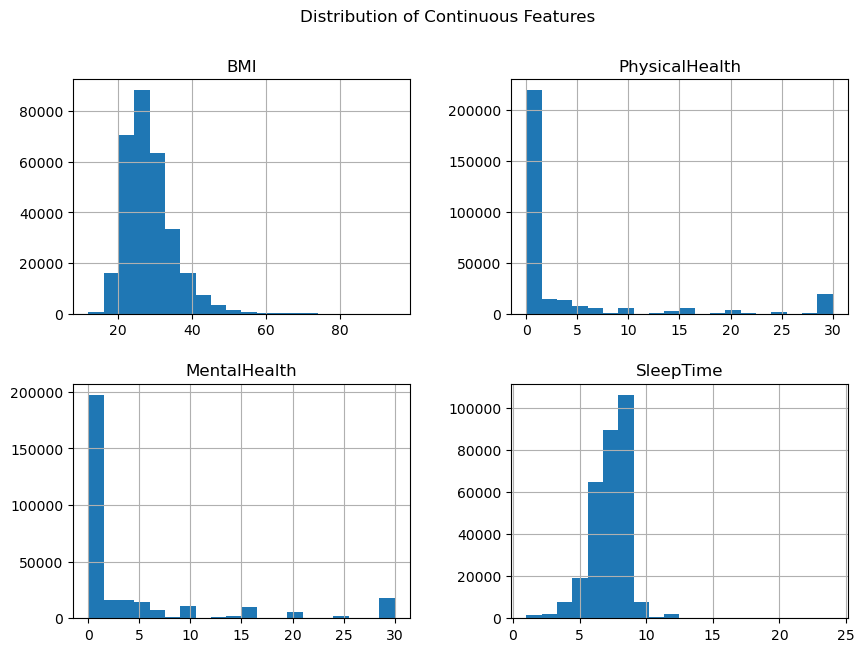

In [10]:
# Histograms for continuous features
data[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].hist(bins=20, figsize=(10, 7))
plt.suptitle("Distribution of Continuous Features")
plt.show()

c:\Users\ilham\anacondapy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


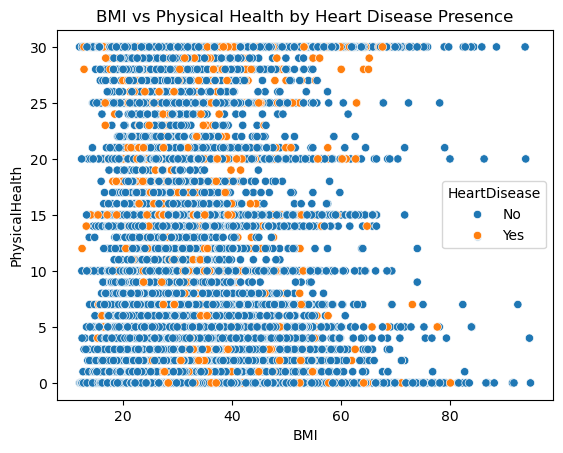

In [11]:
# Scatter plot to see correlations with the target variable 'HeartDisease'
sns.scatterplot(x='BMI', y='PhysicalHealth', hue='HeartDisease', data=data)
plt.title("BMI vs Physical Health by Heart Disease Presence")
plt.show()

In [12]:
# Encode categorical features as numeric values
data_encoded = data.copy()
data_encoded['HeartDisease'] = data_encoded['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['Smoking'] = data_encoded['Smoking'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['AlcoholDrinking'] = data_encoded['AlcoholDrinking'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['Stroke'] = data_encoded['Stroke'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['DiffWalking'] = data_encoded['DiffWalking'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['PhysicalActivity'] = data_encoded['PhysicalActivity'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['Asthma'] = data_encoded['Asthma'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['KidneyDisease'] = data_encoded['KidneyDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['SkinCancer'] = data_encoded['SkinCancer'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding ordinal features
data_encoded['Sex'] = data_encoded['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
data_encoded['GenHealth'] = data_encoded['GenHealth'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4})

# One-hot encoding for nominal features (AgeCategory, Race, Sex, Diabetic)
data_encoded = pd.get_dummies(data_encoded, columns=['AgeCategory', 'Race', 'Sex', 'Diabetic'], drop_first=True)

# Compute correlation matrix and extract correlations with 'HeartDisease'
correlation_matrix = data_encoded.corr()
heart_disease_corr = correlation_matrix["HeartDisease"].sort_values(ascending=False)
print(heart_disease_corr)


HeartDisease                        1.000000
DiffWalking                         0.196420
Stroke                              0.194665
Diabetic_Yes                        0.178917
PhysicalHealth                      0.165235
AgeCategory_80 or older             0.143466
KidneyDisease                       0.142672
Smoking                             0.104524
AgeCategory_75-79                   0.098552
SkinCancer                          0.090644
AgeCategory_70-74                   0.084840
Sex_1                               0.074435
Race_White                          0.048892
BMI                                 0.047260
AgeCategory_65-69                   0.045734
Asthma                              0.035784
MentalHealth                        0.020913
AgeCategory_60-64                   0.018989
Diabetic_No, borderline diabetes    0.013793
SleepTime                           0.010834
Race_Other                         -0.006076
AgeCategory_55-59                  -0.011854
Race_Black